# Implementing a Deep Neural Network with NumPy
In this chapter, you will briefly study the theory behind the different types of
neural networks. You will study a simple densely connected neural network
(DNN), a convolutional neural network (CNN), a recurrent neural network
(RNN), and LSTM (which is a type of recurrent neural network).

## 1. Neural Network with a Single Output
In this section, you will implement a densely connected neural network with
a single output from scratch. In addition, you will be learning how to find a
non-linear boundary to separate two classes.

In a neural network, we have an input layer, one or multiple hidden layers,
and an output layer. In our neural network, we have two nodes in the input
layer (since there are two features in the input), one hidden layer with four
nodes, and one output layer with one node since we are doing binary
classification. The number of hidden layers and the number of neurons per
hidden layer depend upon you.
In the above neural network, x1 and x2 are the input features, and ao is the
output of the network. Here, the only thing we can control is the weights w1,
w2, w3, … w12. The idea is to find the values of weights for which the
difference between the predicted output, ao in this case, and the actual output
(labels) is minimum.
A neural network works in two steps:
1. Feed Forward
2. BackPropagation

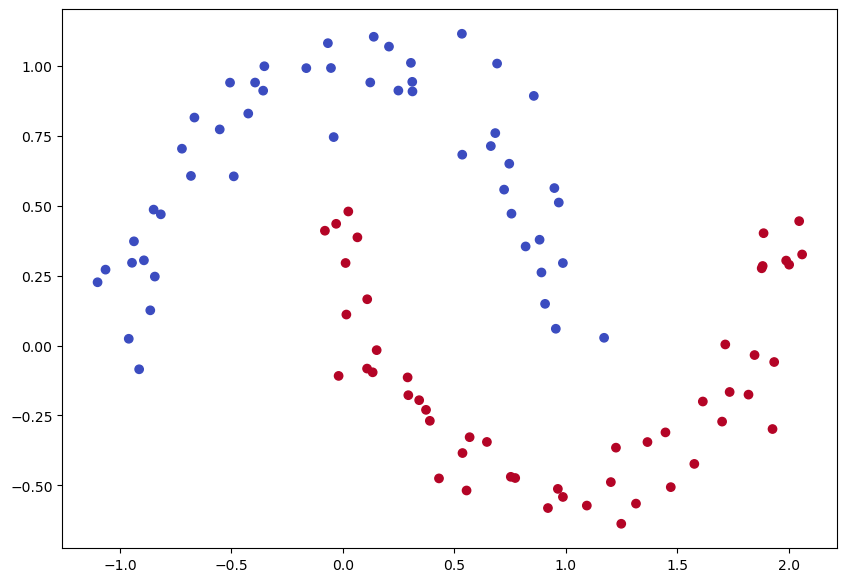

In [1]:
# Import the datasets module from scikit-learn for generating sample datasets
from sklearn import datasets

# Import NumPy for numerical operations
import numpy as np

# Import matplotlib's pyplot module for plotting
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebooks (plots appear below the code cell)
%matplotlib inline

# Set a random seed for reproducibility (ensures the same random numbers are generated every run)
np.random.seed(0)

# Generate a 2D dataset of 100 points shaped like two interleaving half circles ("moons") with some added noise
X, y = datasets.make_moons(100, noise=0.10)

# Extract the first feature (x-coordinate) from the dataset
x1 = X[:, 0]

# Extract the second feature (y-coordinate) from the dataset
x2 = X[:, 1]

# Create a new figure with a specified size (10 inches by 7 inches)
plt.figure(figsize=(10, 7))

# Create a scatter plot of the data points
# Color the points based on their class label (y) using a colormap (coolwarm)
plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)

In [2]:
# Reshape the array y to have shape (number of rows, 1 column)
# y.shape[0] gives the number of rows in y (i.e., its first dimension)
# The new shape will make y a 2D column vector with one value per row
y = y.reshape(y.shape[0], 1)

In [3]:
# Print the shape (dimensions) of the NumPy array X
# This shows how many rows and columns X has (e.g., (100, 5) means 100 rows and 5 columns)
print(X.shape)

# Print the shape (dimensions) of the NumPy array y
# This helps check if y aligns correctly with X (e.g., (100,) means 100 labels for 100 rows in X)
print(y.shape)

(100, 2)
(100, 1)


### 2. Implementation with NumPy Library

In [4]:
def define_parameters(weights):
    """
    Initialize weight matrices and bias vectors for a neural network.

    Parameters:
    weights (list): A list where each element represents the number of neurons in each layer.
                   Example: [3, 5, 2] means input layer with 3 neurons, one hidden layer with 5,
                   and output layer with 2 neurons.

    Returns:
    weight_list (list of np.ndarray): List of weight matrices for each layer.
    bias_list (list of np.ndarray): List of bias vectors for each layer.
    """

    weight_list = []  # To store weight matrices between layers
    bias_list = []    # To store bias vectors for each layer

    # Loop over pairs of layers to initialize weights and biases
    for i in range(len(weights) - 1):
        # Initialize weight matrix for layer i -> i+1
        # Shape: (neurons_in_current_layer, neurons_in_next_layer)
        w = np.random.randn(weights[i], weights[i + 1])

        # Initialize bias vector for next layer
        # Shape: (neurons_in_next_layer,)
        b = np.random.randn(weights[i + 1])

        # Append to the respective lists
        weight_list.append(w)
        bias_list.append(b)

    # Return the list of weight matrices and bias vectors
    return weight_list, bias_list

In [5]:
# Define the sigmoid activation function
def sigmoid(x):
    """
    Compute the sigmoid of x.

    Parameters:
    x : A scalar or NumPy array of any size

    Returns:
    Sigmoid of x
    """
    # Apply the sigmoid formula: 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


In [6]:
# Define the derivative of the sigmoid function
def sigmoid_der(x):
    # Compute the derivative of the sigmoid function using the formula:
    # sigmoid'(x) = sigmoid(x) * (1 - sigmoid(x))
    # This is useful for backpropagation in neural networks
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def predictions(w, b, X):
    """
    Compute predictions for a simple 2-layer neural network.

    Parameters:
    w : list of numpy arrays
        Weight matrices for hidden and output layers [w_hidden, w_output].
    b : list of numpy arrays
        Bias vectors for hidden and output layers [b_hidden, b_output].
    X : numpy array
        Input data matrix.

    Returns:
    ao : numpy array
        Output layer activations (predictions).
    """

    # Compute linear combination at the hidden layer: z_hidden = X.w_hidden + b_hidden
    zh = np.dot(X, w[0]) + b[0]

    # Apply sigmoid activation to hidden layer: a_hidden = sigmoid(z_hidden)
    ah = sigmoid(zh)

    # Compute linear combination at the output layer: z_output = a_hidden.w_output + b_output
    zo = np.dot(ah, w[1]) + b[1]

    # Apply sigmoid activation to output layer: a_output = sigmoid(z_output)
    ao = sigmoid(zo)

    # Return the final predictions
    return ao

In [8]:
def find_cost(ao, y):
    """
    Compute the cost (mean squared error) between predicted values and actual values.

    Parameters:
    ao (numpy array): Predicted outputs (activations of output layer).
    y (numpy array): Actual target values.

    Returns:
    float: The mean squared error cost.
    """
    # Get the number of training examples (number of rows in y)
    m = y.shape[0]

    # Compute the squared differences between predicted values and actual values
    # Then sum all squared differences
    squared_diff_sum = np.sum(np.square(ao - y))

    # Compute the mean squared error by dividing the total squared difference by m
    total_cost = (1 / m) * squared_diff_sum

    # Return the computed cost
    return total_cost

In [9]:
def find_derivatives(w, b, X):
    # Forward pass: compute activations for hidden layer and output layer
    zh = np.dot(X, w[0]) + b[0]  # Linear combination for hidden layer (XW + b)
    ah = sigmoid(zh)             # Activation of hidden layer using sigmoid
    zo = np.dot(ah, w[1]) + b[1] # Linear combination for output layer (a_hidden * W + b)
    ao = sigmoid(zo)             # Activation of output layer using sigmoid (model's prediction)

    # Backpropagation phase 1: compute gradients for output layer
    m = y.shape[0]               # Number of samples in the batch
    dcost_dao = (1/m) * (ao - y) # Derivative of cost w.r.t. output activation (Mean squared error derivative)
    dao_dzo = sigmoid_der(zo)    # Derivative of sigmoid activation w.r.t. linear output zo
    dzo_dwo = ah.T               # Derivative of linear output w.r.t. weights of output layer
    dwo = np.dot(dzo_dwo, dcost_dao * dao_dzo) # Gradient of cost w.r.t. output layer weights
    dbo = np.sum(dcost_dao * dao_dzo)          # Gradient of cost w.r.t. output layer bias

    # Backpropagation phase 2: compute gradients for hidden layer
    # Gradients flow backward: dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    dcost_dzo = dcost_dao * dao_dzo           # Derivative of cost w.r.t. linear output zo
    dzo_dah = w[1].T                          # Derivative of zo w.r.t. hidden activation ah
    dcost_dah = np.dot(dcost_dzo, dzo_dah)    # Derivative of cost w.r.t. hidden activation ah
    dah_dzh = sigmoid_der(zh)                 # Derivative of sigmoid activation w.r.t. linear hidden output zh
    dzh_dwh = X.T                             # Derivative of linear hidden output w.r.t. hidden weights
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah) # Gradient of cost w.r.t. hidden layer weights
    dbh = np.sum(dah_dzh * dcost_dah)          # Gradient of cost w.r.t. hidden layer bias

    return dwh, dbh, dwo, dbo  # Return gradients for hidden weights/bias and output weights/bias

In [10]:
def update_weights(w, b, dwh, dbh, dwo, dbo, lr):
    # Update the weights of the hidden layer (w[0]) by subtracting the learning rate scaled gradient (dwh)
    w[0] = w[0] - lr * dwh

    # Update the weights of the output layer (w[1]) by subtracting the learning rate scaled gradient (dwo)
    w[1] = w[1] - lr * dwo

    # Update the bias of the hidden layer (b[0]) by subtracting the learning rate scaled gradient (dbh)
    b[0] = b[0] - lr * dbh

    # Update the bias of the output layer (b[1]) by subtracting the learning rate scaled gradient (dbo)
    b[1] = b[1] - lr * dbo

    # Return the updated weights and biases
    return w, b

In [11]:
def my_neural_network(X, y, lr, epochs):
    # Initialize a list to store the cost (error) at each epoch
    error_list = []

    # Get the number of input features (columns of X)
    input_len = X.shape[1]

    # Get the number of output features (columns of y)
    output_len = y.shape[1]

    # Initialize weights (w) and biases (b) for the neural network
    # The network architecture is: input layer -> 4 neurons (hidden layer) -> output layer
    w, b = define_parameters([input_len, 4, output_len])

    # Loop through the specified number of epochs (training iterations)
    for i in range(epochs):
        # Perform a forward pass: compute the predictions using current weights and biases
        ao = predictions(w, b, X)

        # Calculate the cost (loss) between predicted outputs and actual outputs
        cost = find_cost(ao, y)

        # Append the current cost to the error list for tracking
        error_list.append(cost)

        # Compute the gradients (partial derivatives) of the cost function
        # with respect to weights and biases for backpropagation
        dwh, dbh, dwo, dbo = find_derivatives(w, b, X)

        # Update weights and biases using the computed gradients and learning rate
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)

        # Print the cost every 50 epochs to monitor training progress
        if i % 50 == 0:
            print(cost)

    # Return the trained weights, biases, and the list of costs for plotting or analysis
    return w, b, error_list


In [12]:
# Set the learning rate for the neural network (controls how much weights are updated during training)
lr = 0.5  

# Set the number of epochs (how many times the entire dataset is passed through the network)
epochs = 2000  

# Call the function 'my_neural_network' to train the model
# Pass input data X, target labels y, learning rate lr, and number of epochs
# The function returns:
#   w - the learned weights after training
#   b - the learned bias after training
#   error_list - a list of error/loss values recorded during each epoch
w, b, error_list = my_neural_network(X, y, lr, epochs)  

0.3062266506114698
0.23872590039569871
0.20318219119019548
0.17897484253256557
0.16146491038590757
0.14837106508463183
0.1381917726285601
0.1299948658554513
0.12322017116800794
0.11752806211186488
0.11270443316784048
0.10860482892306533
0.10512249789352662
0.10217095171235437
0.09967533917272087
0.09756890837719104
0.09579201421816298
0.09429205166645283
0.09302345281163747
0.09194742464566298
0.09103140843716637
0.09024836165503498
0.08957597712898022
0.08899592474608016
0.08849316474997973
0.088055353226584
0.08767234228757875
0.08733576781421695
0.08703871352988475
0.08677543927769746
0.0865411621107958
0.08633188021738264
0.08614423128871822
0.08597537844543857
0.08582291816115703
0.08568480573460054
0.08555929477167547
0.08544488787129557
0.08534029629210271
0.08524440683879168


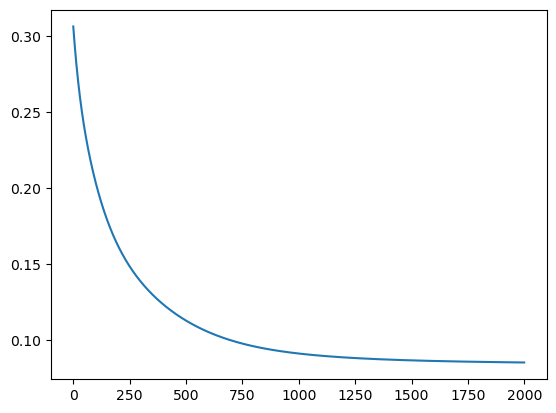

In [13]:
# Plot the values in error_list as a line graph
# error_list: a list or array of error values (e.g., from training a model)
# plt.plot() creates a 2D line plot where the x-axis is the index of each error value (0, 1, 2, ...) 
# and the y-axis is the error value itself
plt.plot(error_list)

### 2. Neural Network with Multiple Outputs
In the previous section, you did a binary classification where you predicted
whether a point is red or blue. However, in most real-world applications, you
have to classify between more than two objects. For instance, you might be
given an image, and you have to guess the single digit in the image. In that
case, the number of possible outputs will be 0–9 = 10. The types of problems
where you have more than two possible outputs are called multiclass
classification problems.
To implement multiclass classification problems, you have to make three
changes in the neural network with a single output. The changes are as
follows:
1. The number of nodes in the output layer should be equal to the
number of possible outputs.
2. The Softmax activation function should be used in the final output
layer.
3. To reduce the cost, a negative log-likelihood function should be used
as the loss function.

In [15]:
import numpy as np  # Import the NumPy library for numerical computations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

np.random.seed(42)  # Set random seed for reproducibility

# Generate 800 random 2D points for category 1, centered around (0, -3)
cat1 = np.random.randn(800, 2) + np.array([0, -3])

# Generate 800 random 2D points for category 2, centered around (3, 3)
cat2 = np.random.randn(800, 2) + np.array([3, 3])

# Generate 800 random 2D points for category 3, centered around (-3, 3)
cat3 = np.random.randn(800, 2) + np.array([-3, 3])

# Stack all three categories vertically to form one dataset (2400 samples, 2 features each)
X = np.vstack([cat1, cat2, cat3])

# Create labels: 0 for cat1, 1 for cat2, 2 for cat3 (each label repeated 800 times)
labels = np.array([0]*800 + [1]*800 + [2]*800)

# Initialize a zero matrix for one-hot encoded labels (2400 samples, 3 classes)
y = np.zeros((2400, 3))

# Convert the integer labels into one-hot encoded labels
for i in range(2400):
    y[i, labels[i]] = 1  # Set the column corresponding to the class label to 1


In [16]:
# Print the shape (dimensions) of the NumPy array X
# This tells us how many rows and columns are in X
print(X.shape)

# Print the shape (dimensions) of the NumPy array y
# This tells us how many elements are in y (useful for labels or target values)
print(y.shape)


(2400, 2)
(2400, 3)


C:\Users\dchen\AppData\Local\Temp\ipykernel_1584\979979644.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)


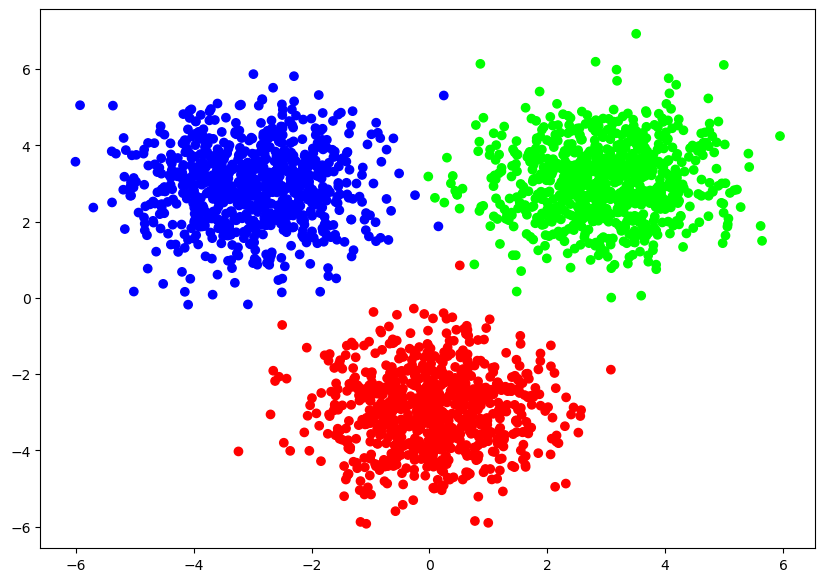

In [17]:
# Extract the first column from X (all rows, column 0) and assign it to x1
x1 = X[:, 0]

# Extract the second column from X (all rows, column 1) and assign it to x2
x2 = X[:, 1]

# Create a new figure with a specified size of 10 inches wide and 7 inches tall
plt.figure(figsize=(10, 7))

# Create a scatter plot of x1 vs x2
# Color each point based on its corresponding value in y
# Use the 'coolwarm' colormap to map y values to colors
plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)


In [18]:
# Import numpy for numerical operations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate three clusters of data (each representing a "category" or "class")
# Each cluster has 800 samples with 2 features
cat1 = np.random.randn(800, 2) + np.array([0, -3])   # Cluster centered at (0, -3)
cat2 = np.random.randn(800, 2) + np.array([3, 3])    # Cluster centered at (3, 3)
cat3 = np.random.randn(800, 2) + np.array([-3, 3])   # Cluster centered at (-3, 3)

# Stack all clusters vertically into a single dataset (shape: (2400, 2))
X = np.vstack([cat1, cat2, cat3])

# Create labels for each cluster: 0 for cat1, 1 for cat2, 2 for cat3
labels = np.array([0]*800 + [1]*800 + [2]*800)

# One-hot encode the labels into a matrix `y` (shape: (2400, 3))
# Each row of `y` has a 1 in the column of its class and 0 elsewhere
y = np.zeros((2400, 3))
for i in range(2400):
    y[i, labels[i]] = 1  # Set the correct class position to 1

# Define a function to initialize weights and biases for a neural network
def define_parameters(weights):
    weight_list = []  # List to store weight matrices
    bias_list = []    # List to store biases
    # Loop through each layer pair (input to hidden, hidden to output, etc.)
    for i in range(len(weights) - 1):
        w = np.random.randn(weights[i], weights[i+1])  # Random weights
        b = np.random.randn()                          # Random bias (single scalar)
        weight_list.append(w)  # Add weight matrix to list
        bias_list.append(b)    # Add bias to list
    return weight_list, bias_list  # Return lists of weights and biases

# Define the softmax activation function (used for multi-class classification)
def softmax(X):
    expX = np.exp(X)  # Exponentiate all values
    return expX / expX.sum(axis=1, keepdims=True)  # Normalize to get probabilities

# Define the sigmoid activation function (used for hidden layers)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid formula

# Define derivative of sigmoid (used for backpropagation)
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))  # Derivative formula

# Define function to compute predictions of the network
def predictions(w, b, X):
    zh = np.dot(X, w[0]) + b[0]  # Linear combination for hidden layer
    ah = sigmoid(zh)            # Activation of hidden layer
    zo = np.dot(ah, w[1]) + b[1]  # Linear combination for output layer
    ao = softmax(zo)            # Activation of output layer (probabilities)
    return ao  # Return predicted probabilities for each class


In [19]:
import numpy as np

# Function to compute the cost (cross-entropy loss) for multi-class classification
def find_cost(ao, y):
    # ao: predicted output from the network (after softmax)
    # y: actual target values (one-hot encoded)
    # Cross-entropy loss formula: -sum(y * log(ao))
    total_cost = np.sum(-y * np.log(ao))
    return total_cost

# Function to compute gradients (backpropagation)
def find_derivatives(w, b, X):
    # Forward pass to compute activations
    zh = np.dot(X, w[0]) + b[0]     # Hidden layer linear combination (z = X*w + b)
    ah = sigmoid(zh)                # Hidden layer activation using sigmoid
    zo = np.dot(ah, w[1]) + b[1]    # Output layer linear combination
    ao = softmax(zo)                # Output layer activation using softmax

    # Backpropagation phase 1: compute gradients for output layer weights and biases
    dcost_dzo = (ao - y)            # Derivative of cost w.r.t. output layer linear combination
    dzo_dwo = ah.T                  # Transpose of hidden activations (for weight gradient)
    dwo = np.dot(dzo_dwo, dcost_dzo)  # Gradient of cost w.r.t. output layer weights
    dbo = np.sum(dcost_dzo, axis=0)   # Gradient of cost w.r.t. output layer biases

    # Backpropagation phase 2: compute gradients for hidden layer weights and biases
    dzo_dah = w[1].T                # Derivative of output z w.r.t. hidden activations
    dcost_dah = np.dot(dcost_dzo, dzo_dah)  # Chain rule: derivative of cost w.r.t. hidden activations
    dah_dzh = sigmoid_der(zh)       # Derivative of sigmoid activation
    dzh_dwh = X.T                   # Transpose of input X
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)  # Gradient of cost w.r.t. hidden layer weights
    dbh = np.sum(dah_dzh * dcost_dah, axis=0)  # Gradient of cost w.r.t. hidden layer biases

    return dwh, dbh, dwo, dbo

# Function to update weights and biases using gradient descent
def update_weights(w, b, dwh, dbh, dwo, dbo, lr):
    # Update hidden layer weights and biases
    w[0] = w[0] - lr * dwh
    b[0] = b[0] - lr * dbh
    # Update output layer weights and biases
    w[1] = w[1] - lr * dwo
    b[1] = b[1] - lr * dbo
    return w, b

# Function to train the neural network
def my_multiout_neural_network(X, y, lr, epochs):
    # X: input data
    # y: target data (one-hot encoded)
    # lr: learning rate
    # epochs: number of training iterations
    error_list = []  # To store cost at each epoch for tracking
    input_len = X.shape[1]  # Number of input features
    output_len = y.shape[1] # Number of output classes

    # Initialize weights and biases for 2-layer network (input -> hidden -> output)
    w, b = define_parameters([input_len, 4, output_len])

    # Training loop
    for i in range(epochs):
        ao = predictions(w, b, X)  # Forward pass: get predictions
        cost = find_cost(ao, y)    # Compute current cost
        error_list.append(cost)    # Store cost for analysis

        # Backpropagation: compute gradients
        dwh, dbh, dwo, dbo = find_derivatives(w, b, X)

        # Update weights and biases
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)

        # Print cost every 50 epochs for monitoring
        if i % 50 == 0:
            print(f"Epoch {i}: Cost = {cost}")

    return w, b, error_list  # Return final weights, biases, and error history

# Hyperparameters
lr = 0.0005
epochs = 1000

# Train the network
w, b, error_list = my_multiout_neural_network(X, y, lr, epochs)


Epoch 0: Cost = 3853.4146795964803
Epoch 50: Cost = 121.64856281608303
Epoch 100: Cost = 64.94278323629972
Epoch 150: Cost = 46.07347111384274
Epoch 200: Cost = 36.63204854220335
Epoch 250: Cost = 30.943161362687118
Epoch 300: Cost = 27.126865271137376
Epoch 350: Cost = 24.38153826829649
Epoch 400: Cost = 22.30740331662645
Epoch 450: Cost = 20.682404669543097
Epoch 500: Cost = 19.373099515493124
Epoch 550: Cost = 18.29434386126065
Epoch 600: Cost = 17.389191572593887
Epoch 650: Cost = 16.618081501116855
Epoch 700: Cost = 15.952656244337748
Epoch 750: Cost = 15.372048412665663
Epoch 800: Cost = 14.860555068082203
Epoch 850: Cost = 14.40612956191637
Epoch 900: Cost = 13.999373678801366
Epoch 950: Cost = 13.632846359769138


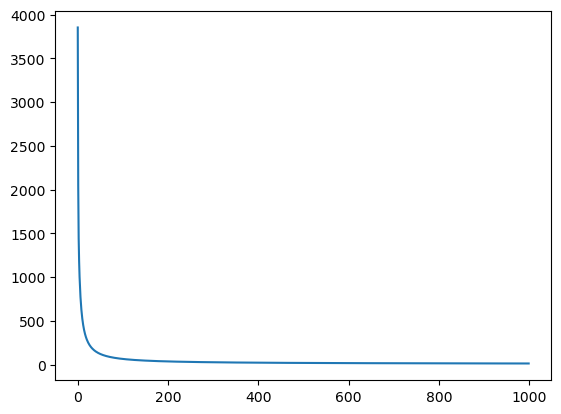

In [20]:
# Plot the values stored in error_list as a line graph
# error_list is expected to be a list or NumPy array containing error values (e.g., from a training loop)
plt.plot(error_list)  # Draws a line plot where x-axis = index in error_list, y-axis = error value